In [151]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline 

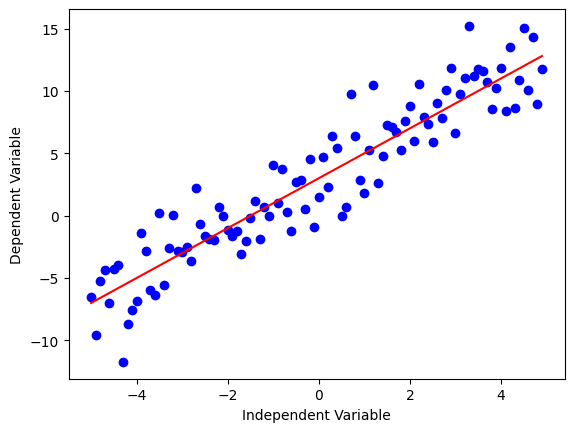

In [152]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise =2 *np.random.normal(size=x.size)
ydata = y +y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


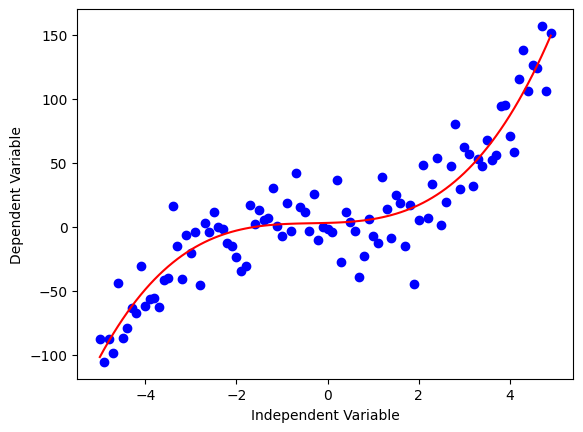

In [153]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

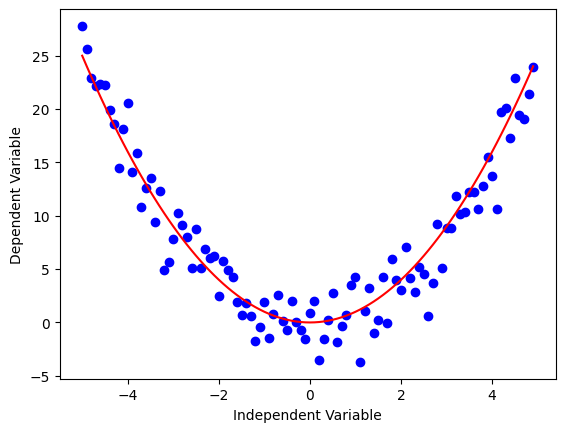

In [154]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


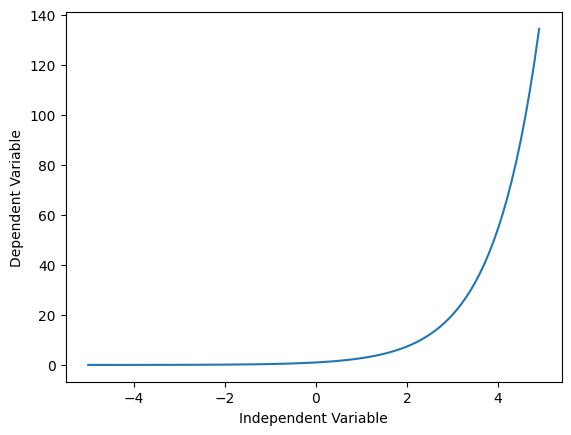

In [155]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

C:\Users\kavosh-lp\AppData\Local\Temp\ipykernel_7512\2233958358.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


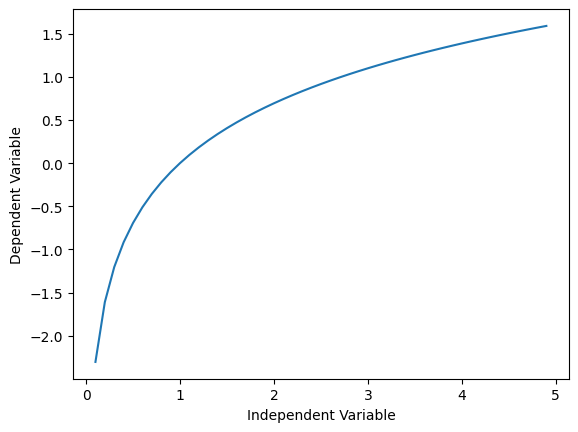

In [156]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

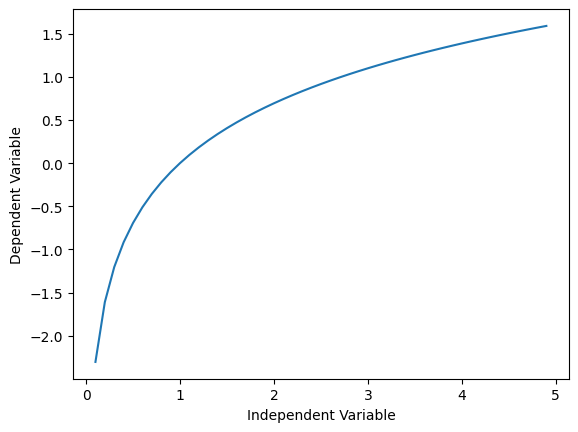

In [157]:
X = np.arange(-5.0, 5.0, 0.1)

def power(x,z):
    y= 1-4/(1+np.power(3,x-z))
    return y
z=1
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [158]:
df=pd.read_csv("china_gdp.csv")

In [159]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


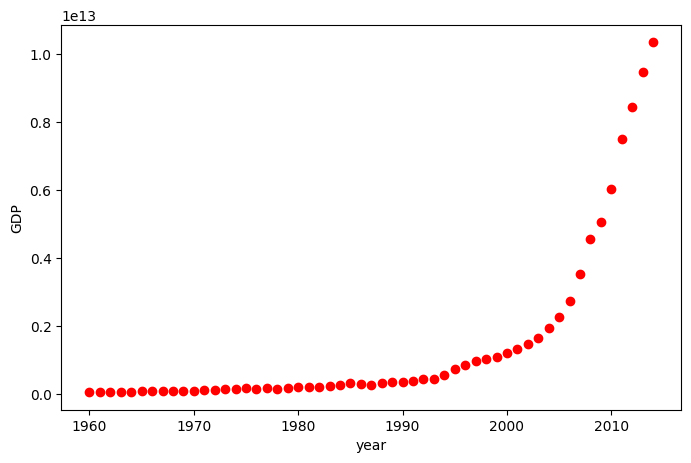

In [160]:
plt.figure(figsize=(8,5))
x_data,y_data=(df["Year"].values,df['Value'].values)
plt.plot(x_data,y_data,"ro")
plt.ylabel("GDP")
plt.xlabel("year")
plt.show()


In [161]:
def sigmoid(x,beat1,beat2):
    Y=1/(1+np.exp(-beat1*(x-beat2)))
    return Y



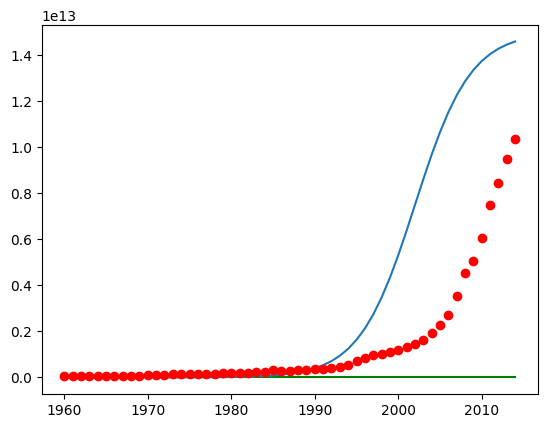

In [162]:
beat1=0.3
beat2=2002

y_pred=sigmoid(x_data,beat1,beat2)

plt.plot(x_data,y_pred,"g")
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

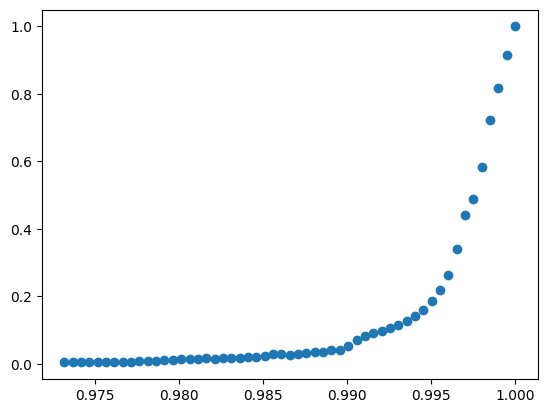

In [163]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
plt.scatter(xdata,ydata)
plt.show()

In [192]:
from scipy.optimize import curve_fit                                        
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


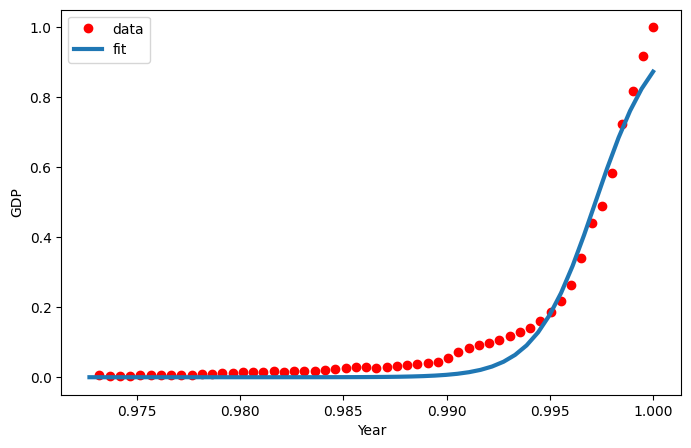

In [179]:
x = np.linspace(1960, 2015, 50)
x=x/max(x)

plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [191]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
#print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
#print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

R2-score: 0.95
